# A globális földgáz piac működésének áttekintése
## Python jupyter átírat

***
Az alábbi prezeentáció egy dinamikus átirata az órán bemutatott prezentációnak

- adatforrás beolvasása, oszlopok (ismérvek) és jellemzők áttekintése
- listaelem2
- listaelem3




In [7]:
import pandas as pd
bp = pd.read_csv('bp-stats-review-2020-consolidated-dataset-narrow-format.csv')

In [8]:
bp.head(5)

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
0,Algeria,1965,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,wind_twh,0.0
1,Algeria,1966,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,wind_twh,0.0
2,Algeria,1967,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,wind_twh,0.0
3,Algeria,1968,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,wind_twh,0.0
4,Algeria,1969,DZA,12.0,Africa,Northern Africa,1.0,0.0,0.0,0.0,wind_twh,0.0


In [12]:
bp.Var.unique()

array(['wind_twh', 'wind_mtoe', 'wind_ej', 'solar_twh', 'solar_mtoe',
       'solar_ej', 'renewables_mtoe', 'renewables_ej', 'ren_power_twh',
       'ren_power_mtoe', 'ren_power_ej', 'refthru_kbd', 'refcap_kbd',
       'rareearths_kt', 'primary_mtoe', 'primary_gj_pc', 'primary_ej',
       'oilreserves_bbl', 'oilprod_ngl_kbd', 'oilprod_mt', 'oilprod_kbd',
       'oilprod_crudecond_kbd', 'oilcons_mtoe', 'oilcons_mt',
       'oilcons_kbd', 'oilcons_ej', 'nuclear_twh', 'nuclear_mtoe',
       'nuclear_ej', 'lithium_kt', 'liqcons_kbd', 'hydro_twh',
       'hydro_mtoe', 'hydro_ej', 'graphite_kt', 'gasreserves_tcm',
       'gasprod_mtoe', 'gasprod_ej', 'gasprod_bcm', 'gasprod_bcfd',
       'gascons_mtoe', 'gascons_ej', 'gascons_bcm', 'gascons_bcfd',
       'ethanol_prod_pj', 'ethanol_prod_ktoe', 'ethanol_prod_kboed',
       'ethanol_prod_kbd', 'ethanol_cons_pj', 'ethanol_cons_ktoe',
       'ethanol_cons_kboed', 'ethanol_cons_kbd', 'electbyfuel_oil',
       'electbyfuel_gas', 'electbyfuel_coal'

### TOP 20 Top 20 natural gas producers and consumers in 2016

In [13]:
# slide 3 Consumption
bp[(bp.Year == 2019) & (bp.Var == 'gascons_bcfd')]\
    .sort_values(by='Value', ascending =False)\
    .dropna()[['Country', 'Value']]\
    .head(10)\
    .round(2)

,Country,Value
175035,US,81.92
173375,Russian Federation,42.99
171105,China,29.74
172050,Iran,21.64
170995,Canada,11.64
173430,Saudi Arabia,11.00
172325,Japan,10.46
172650,Mexico,8.77
171720,Germany,8.58
175200,United Kingdom,7.63


In [14]:
bp[(bp.Year == 2019) & (bp.Var == 'gasprod_bcfd')]\
    .sort_values(by='Value', ascending =False)\
    .dropna()[['Country', 'Value']]\
    .head(10)\
    .round(2)

,Country,Value
155374,US,89.10
154539,Russian Federation,65.70
153669,Iran,23.62
154454,Qatar,17.23
153319,China,17.18
153269,Canada,16.75
152935,Australia,14.85
154204,Norway,11.07
154589,Saudi Arabia,11.00
152835,Algeria,8.34


In [3]:
bp[(bp.Year >= 2010) & (bp.Var =='gasprod_mtoe')][['Country', 'Year', 'Value']].groupby(['Country', 'Year']).sum().unstack().T.iloc[:,:5]

Country       Algeria  Argentina   Australia  Azerbaijan    Bahrain
      Year                                                         
Value 2010  66.549054  33.531381   46.440772   13.976486  10.686721
      2011  68.442605  32.431509   47.850964   13.715527  10.854754
      2012  67.449484  31.548756   51.183228   14.453806  11.222575
      2013  68.219153  29.712686   53.138562   15.001206  12.001573
      2014  68.935856  29.652519   57.303629   15.807461  12.636737
      2015  70.000978  30.516891   65.381722   16.151378  12.688830
      2016  78.583201  32.057056   82.905611   15.715856  12.387374
      2017  79.945432  31.943154   97.008222   15.269671  12.438799
      2018  80.691101  33.899733  111.868336   16.377142  12.594545
      2019  74.153052  35.783161  131.955372   20.909908  14.530966

Region
Africa                 721.14
Asia Pacific          4611.01
CIS                   1801.67
Europe                 999.92
Middle East           2006.28
North America         2970.17
S. & Cent. America     714.35
Name: Value, dtype: float64


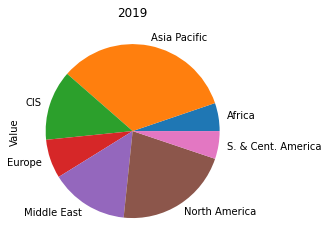

In [4]:
tpes =['coalprod_mtoe','renewables_mtoe','hydro_mtoe', 'nuclear_mtoe', 'gasprod_mtoe', 'oilprod_mt']
year = 2019
print(bp[(bp.Var.isin(tpes)) & (bp.Year==year)].groupby('Region').sum()['Value'].round(2))
chart = bp[(bp.Var.isin(tpes)) & (bp.Year==year)].groupby('Region').sum().plot.pie(y='Value', legend=False, title=year)

In [24]:
bp[(bp.Var.isin(tpes)) & (bp.Year==year)].groupby(['Region', 'OECD']).sum()['Value'].unstack().round(2)

OECD,0.0,1.0
Region,,
Africa,721.14,NaN
Asia Pacific,4026.22,584.79
CIS,1801.67,NaN
Europe,93.65,906.27
Middle East,2005.66,0.62
North America,NaN,2970.17
S. & Cent. America,705.31,9.04


In [6]:
bp[bp.Var.isin(tpes) &(bp.Year>2015)].pivot_table(values='Value',
                                  index=['Year'],
                                  columns=['Region'],
                                  aggfunc='sum').fillna(0)

Region,Africa,Asia Pacific,CIS,Europe,Middle East,North America,S. & Cent. America
Year,,,,,,,
2016,665.046034,4025.366251,1660.647321,1024.525891,2023.909580,2576.078401,761.452201
2017,694.924717,4144.539225,1718.339984,1018.200079,2023.170290,2670.571820,758.104423
2018,715.320210,4395.385043,1784.938713,1019.513586,2065.691961,2853.426795,724.929148
2019,721.141368,4611.007451,1801.673706,999.921787,2006.282569,2970.174719,714.351871


# Főcím
## Alcím

Ide jöhet mindenféle magyarázat. Loerm ipsum bla bla

Var
coalprod_mtoe      3935.34
gasprod_mtoe       3362.32
hydro_mtoe          826.95
nuclear_mtoe        594.84
oilprod_mt         4425.48
renewables_mtoe     679.62
Name: Value, dtype: float64


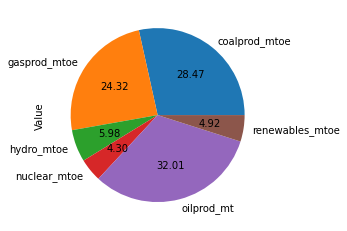

In [26]:
# Slide 5
# Primer energiafogyasztás energiahordozónként
print(bp[(bp.Var.isin(tpes)) & (bp.Year==2019) & (bp.ISO3166_alpha3.notna())].groupby(['Var']).sum()['Value'].round(2))
chart2 = bp[(bp.Var.isin(tpes)) & (bp.Year==2019)& (bp.ISO3166_alpha3.notna())].groupby('Var').sum().plot.pie(y='Value', legend=False, autopct='%.2f',)

In [1]:
# SLIDE 5
# TPES éventként
chart3 = bp[(bp.Var.isin(tpes)) & (bp.Year>1980) & (bp.ISO3166_alpha3.notna())].groupby([ 'Year','Var']).sum()['Value'].unstack().plot(kind='area')

NameError: name 'bp' is not defined

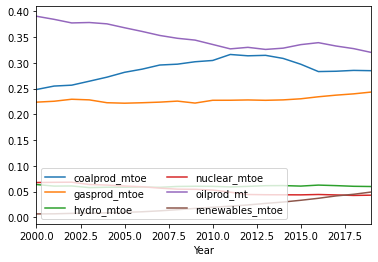

In [31]:
# SLIDE 6
# Tüzelőanyagok részesedésének változása a globális TPES-ben
bp2 = bp[(bp.Var.isin(tpes)) & (bp.Year>=2000) & (bp.ISO3166_alpha3.notna())].groupby([ 'Year','Var']).sum()['Value'].unstack()
ax = bp2.div(bp2.sum(axis=1), axis=0).plot()
ax.legend(loc='lower left', ncol=2)

In [34]:
# SLIDE 7
# Primer energiaforrás régiónként - tábla
t= bp[(bp.Var.isin(tpes)) & (bp.Year==2019) & (bp.ISO3166_alpha3.notna())].groupby(['Region','Var']).sum()['Value'].unstack()
t.div(t.sum(axis=1), axis=0)


Var,coalprod_mtoe,gasprod_mtoe,hydro_mtoe,nuclear_mtoe,oilprod_mt,renewables_mtoe
Region,,,,,,
Africa,0.201457,0.250263,0.004596,0.004197,0.531700,0.007788
Asia Pacific,0.638667,0.119816,0.079444,0.029891,0.076231,0.055951
CIS,0.150195,0.403846,0.025143,0.024697,0.395726,0.000394
Europe,0.140292,0.196501,0.127434,0.197701,0.143034,0.195037
Middle East,NaN,0.293652,0.003339,0.000680,0.701293,0.001036
North America,0.126093,0.326541,0.048525,0.069086,0.375899,0.053856
S. & Cent. America,0.083667,0.204739,0.187261,0.007334,0.435466,0.081533


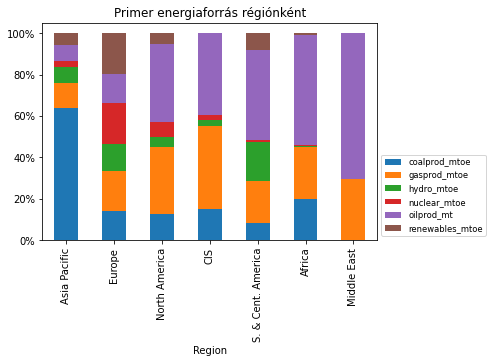

In [39]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
# SLIDE 7
# Primer energiaforrás régiónként - chart
chart4 = t.div(t.sum(axis=1), axis=0).sort_values(['oilprod_mt']).plot(kind='bar', stacked=True, title = 'Primer energiaforrás régiónként')

# ezt itt csak a chart y tengelyének %-os formázása miatt kell
ticks_loc = chart4.get_yticks().tolist()
chart4.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
x = chart4.set_yticklabels(['{:,.0%}'.format(x) for x in chart4.get_yticks()])
l = plt.legend(bbox_to_anchor=(1, 0),loc='lower left', fontsize='small')

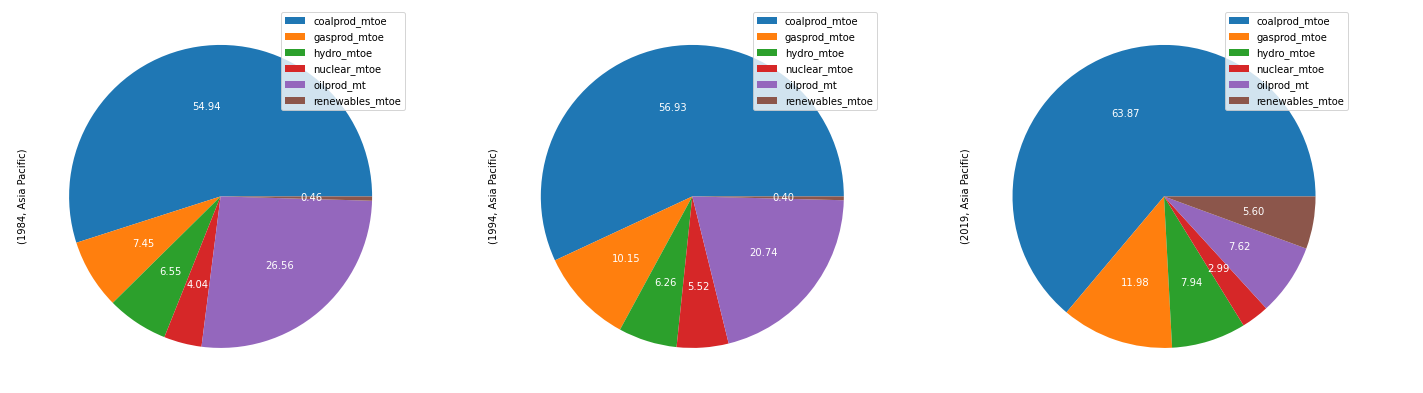

In [47]:
# Slide 8
# A földgáz szerepe a nagy régiókban: kördiagram összehasonlítás évek között régiónként

# Total primary energy supply (excluding electricity trade) by fuel
bp[(bp.Var.isin(tpes)) 
   & (bp.Year.isin(['1984','1994','2019']) 
   & (bp.Region=='Asia Pacific')) 
   & (bp.ISO3166_alpha3.notna())].groupby(['Year','Region','Var']).sum()['Value'].unstack().T.plot.pie(subplots=True, legend = True,autopct='%.2f', figsize=(20,10),textprops={'color':"w"})
plt.tight_layout()
plt.show()

In [49]:
# Slide 10
# GJ per capita: ehhez kelleni for a world bank adatforrás -> wbdata
# kell: gdp, népesség, GJ adat

from datetime import datetime
import wbdata
#https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
data_range = datetime(2010, 1, 1), datetime(2019, 1, 1)              
indicators = {"NY.GDP.PCAP.CD": "Gdp per capita"} 
wbdata.api.get_dataframe(indicators, country=["USA", "HU"], data_date=data_range)

Gdp per capita
country       date                
Hungary       2019    16731.821514
              2018    16410.187264
              2017    14605.854345
              2016    13090.506729
              2015    12706.891215
              2014    14267.012155
              2013    13687.514059
              2012    12950.686515
              2011    14216.165611
              2010    13191.621264
United States 2019    65297.517508
              2018    62996.471285
              2017    60062.222313
              2016    57951.584082
              2015    56839.381774
              2014    55064.744548
              2013    53117.667850
              2012    51610.605278
              2011    49886.818109
              2010    48467.515777

Region,Africa,Asia Pacific,CIS,Europe,Middle East,North America,S. & Cent. America
Var,,,,,,,
coalprod_mtoe,0.036916,0.748320,0.068762,0.035646,NaN,0.095168,0.015187
gasprod_mtoe,0.053676,0.164313,0.216398,0.058437,0.175221,0.288457,0.043498
hydro_mtoe,0.004008,0.442972,0.054778,0.154089,0.008101,0.174289,0.161763
nuclear_mtoe,0.005088,0.231706,0.074804,0.332336,0.002295,0.344964,0.008808
oilprod_mt,0.086642,0.079427,0.161105,0.032318,0.317930,0.252286,0.070292
renewables_mtoe,0.008263,0.379609,0.001044,0.286957,0.003060,0.235368,0.085700


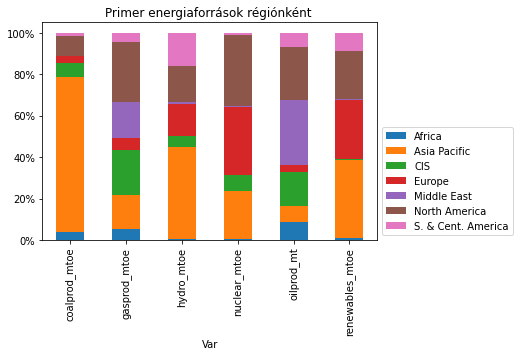

In [50]:
# Slide 15
# A gáz mindenütt népszerű (BP, 2019)

# Primer energiaforrás régiónként - tábla
tpes_by_source = bp[(bp.Var.isin(tpes)) & (bp.Year==2019) & (bp.ISO3166_alpha3.notna())].groupby(['Var','Region']).sum()['Value'].unstack()
display(tpes_by_source.div(tpes_by_source.sum(axis=1), axis=0))

# chart megjelenítése
chart_tpes_by_source = tpes_by_source.div(tpes_by_source.sum(axis=1), axis=0).plot(kind='bar', stacked=True, title = 'Primer energiaforrások régiónként ')
ticks_loc = chart_tpes_by_source.get_yticks().tolist()
chart_tpes_by_source.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
x = chart_tpes_by_source.set_yticklabels(['{:,.0%}'.format(x) for x in chart_tpes_by_source.get_yticks()])
l = plt.legend(bbox_to_anchor=(1, 0),loc='lower left')

Var,gasprod_mtoe
Region,
Africa,0.053676
Asia Pacific,0.164313
CIS,0.216398
Europe,0.058437
Middle East,0.175221
North America,0.288457
S. & Cent. America,0.043498


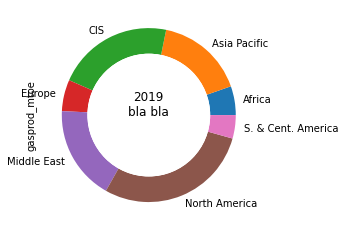

In [51]:
# Slide 18: A bizonyított földgáz készletek 200 tcm körül (BP, 2019)

t18 = tpes_by_source.div(tpes_by_source.sum(axis=1), axis=0)[1:2].T
display(t18)
# create data
size_of_groups=[12,11,3,30]
 
# Create a pieplot
ax = t18.plot.pie(y = 'gasprod_mtoe', legend=False)

#plt.show()
 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.add_patch(my_circle)

ax.annotate("2019\nbla bla", xy=(0, 0), fontsize=12, ha="center")

# ax.axis('off')
# ax.set_aspect('equal')
# ax.autoscale_view()

plt.show()

In [52]:
# Slide 19: A 20 legnagyobb készlettel rendelkező ország, BP 2017
# készlet mennyisége, és részesedése táblázat
# https://www.bp.com/en/global/corporate/news-and-insights/reimagining-energy/global-view-of-gas-infographic.html
# Graphic shows top 20 countries with largest proved gas reserves, in trillion cubic feet and as % of total world share

gas_reserves=bp[(bp.Year==2016) & (bp.Var =='gasreserves_tcm')].sort_values(by='Value', ascending=False).dropna()[['Country', 'Value']].head(10).round(2)
gas_reserves['value_tcf'] = gas_reserves['Value'] * 35.3147
gas_reserves

# display(bp[(bp.Year==2017) & (bp.Var =='oilreserves_bbl')].sort_values(by='Value', ascending=False).dropna()[['Country', 'Value']].head(10).round(2).style.hide_index())

,Country,Value,value_tcf
143084,Russian Federation,34.83,1230.011001
142312,Iran,31.85,1124.773195
143015,Qatar,24.92,880.042324
143707,Turkmenistan,19.49,688.283503
143747,US,8.74,308.650478
143124,Saudi Arabia,8.04,283.930188
143930,Venezuela,6.37,224.954639
143827,United Arab Emirates,5.94,209.769318
142032,China,5.48,193.524556
142735,Nigeria,5.20,183.636440


R/P = Azt mutatja meg, hogy a jelenlegi kitermelési mérték mellett a bizonyított készletek hány évre fedeznék a mai fogyasztást. Számítása: az év végén megmaradt készletek osztva az az évi fogyasztással

Var                      gasprod_bcm  gasreserves_tcm   ratio
Year Region                                                  
2019 Middle East              685.18            75.60  110.34
     CIS                      846.20            64.15   75.81
     Africa                   209.89            13.29   63.34
     S. & Cent. America       170.10             7.93   46.60
     Asia Pacific             642.53            17.42   27.11
     Europe                   228.51             3.22   14.11
     North America           1127.98            15.04   13.33

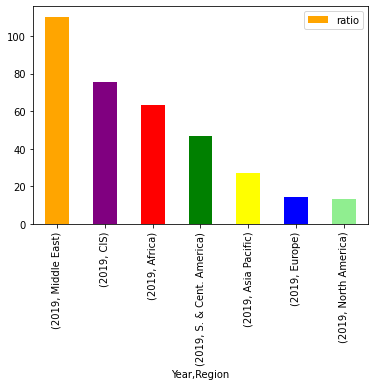

In [53]:
#Slide 22 : Készlet / kitermelés arány változása (BP,2019); világátlag 50.9 év
bp.Var.unique()
rp = bp[(bp.Year==2019) & ((bp.Var == 'gasreserves_tcm') | (bp.Var =='gasprod_bcm'))].groupby(['Year', 'Region', 'Var'])['Value'].sum().unstack()
rp['ratio'] =  rp.gasreserves_tcm*1000 /rp.gasprod_bcm 
rp.sort_values(by='ratio',ascending=False).plot(kind='bar', y='ratio',color=['orange', 'purple', 'red', 'green', 'yellow',
                                                                             'blue', 'lightgreen'])
display(rp.sort_values(by='ratio',ascending=False).round(2))

<AxesSubplot:xlabel='Year'>

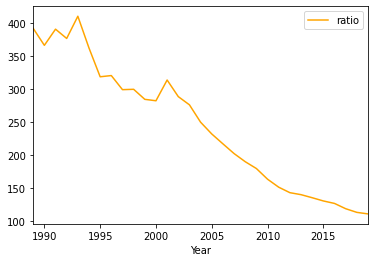

In [56]:
rph = bp[((bp.Year>1988) & (bp.Region =='Middle East')) & ((bp.Var == 'gasreserves_tcm') | (bp.Var =='gasprod_bcm'))].groupby(['Year','Var'])['Value'].sum().unstack()
rph['ratio'] =  rph.gasreserves_tcm*1000 /rph.gasprod_bcm 
rph.plot(y='ratio', color='orange')

<AxesSubplot:title={'center':'consumption by region'}, xlabel='Year'>

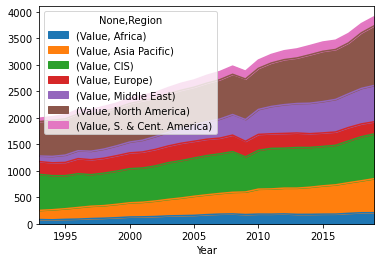

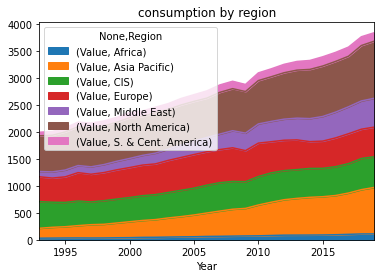

In [57]:
# Slide 24: Földgáz termelés és felhasználás régiónként, Bcm (BP, 2019)
# production by region
pbr = bp[(bp.Var == 'gasprod_bcm') & (bp.Year>1992)].groupby(['Year','Region']).sum()[[ 'Value']].unstack()
# consumption by region
# Gáz: még mindig regionális piac
pbr.plot(kind='area')

cbr = bp[(bp.Var == 'gascons_bcm') & (bp.Year>1992)].groupby(['Year','Region']).sum()[[ 'Value']].unstack()
# 
# Gáz: még mindig regionális piac
cbr.plot(kind='area', title='consumption by region')

In [58]:
# slide 34 :Széttartó globális földgáz árak – jelentős arbitrázs lehetőségek
# https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy/natural-gas.html.html#natural-gas-prices
gp = pd.read_excel('06 bp-stats-review-2020-all-data.xlsx', sheet_name='Gas - Prices ', skiprows=4)

# ez egy BP adat, de az eredeti forrása: https://www.energyintel.com

# adattisztítás
gp = gp.rename(columns={'Unnamed: 0': 'year',
                       'CIF1': 'Japan LNG CIF',
                       '(JKM)2': 'Japan Korea Marker (JKM)',
                       'Import price 3': 'Average German Import Price',
                       '(Heren NBP Index) 4':'NBP',
                        '(DA Heren Index) 4': 'TTF',
                        'Henry Hub 5': 'US Henry Hub',
                        '(Alberta) 5': 'CAN',
                        'countries CIF 6': 'OECD'})
gp=gp.set_index('year')
gp=gp.dropna(how='all')
gp=gp.drop(['Unnamed: 9'], axis=1)

<AxesSubplot:title={'center':'Prices $/Mmbtu'}, xlabel='year'>

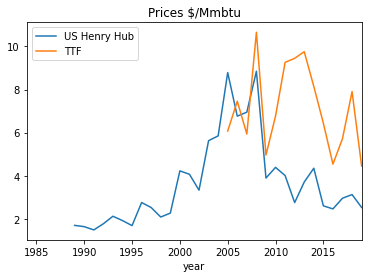

In [59]:
gp[['US Henry Hub', 'TTF']].plot(title='Prices $/Mmbtu')

In [60]:
gp['ttf_hh_spread'] = gp['TTF'] - gp['US Henry Hub']

c:\users\janos\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\janos\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\janos\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

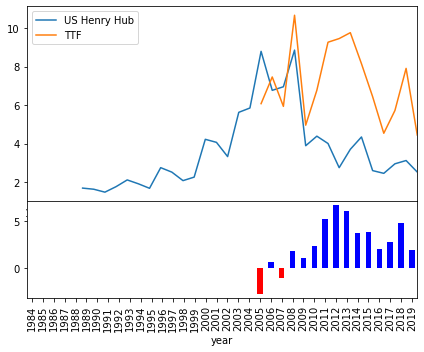

In [61]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=False, gridspec_kw={'hspace': .0, 'height_ratios' : [2,1]}, figsize=(6,5))

ax1=gp[['US Henry Hub', 'TTF']].plot(ax=axs[0])
# axs[0].fill_between(gp.index, gp['US Henry Hub'], gp.TTF)
color = (gp['ttf_hh_spread'] > 0).apply(lambda x: 'b' if x else 'r')
ax2=gp['ttf_hh_spread'].plot(ax=axs[1], kind='bar', color=color)

fig.tight_layout()